In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from libtiff import TIFF
from numpy import unique
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.filters import threshold_otsu
from scipy import ndimage as ndi
from skimage.morphology import watershed, dilation
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

In [3]:
# Helper functions
def contrast_stretch(I):
    I = I.astype('int32')
    values = [pixel[0] for row in I for pixel in row]
    min_old = min(values)
    max_old = max(values)
    min_new = 0
    max_new = 255
    stretched = (I - min_old) * ((max_new - min_new) / (max_old - min_old)) + min_new
    return stretched.astype('uint8')

def otsu_threshold(img):
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = threshold_otsu(img_grey)
    img_array = img_grey > thresh
    return img_array

def greyscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def histogram(I):
    hist = [0] * 256
    for row in I:
        for pixel in row:
            hist[pixel[0]] += 1
    plt.bar(range(len(hist)), hist, 5)
    return hist

In [4]:
os.chdir("/Users/minruilu/Desktop/OneDrive - UNSW/UNSW/2020 Semester 2/comp9517/project/COMP9517 20T2 Group Project Image Sequences/DIC-C2DH-HeLa/Sequence 1")

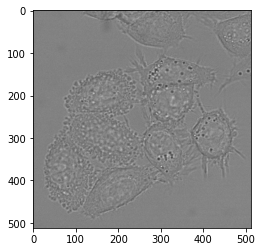

In [5]:
# for dataset 2 and 3
img = cv2.imread("t000.tif",)
plt.imshow(img,'gray')

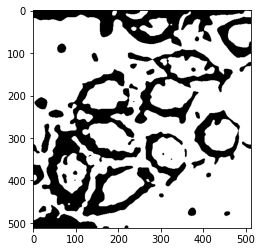

In [7]:
img = cv2.imread("t002.tif",)
norm = None
norm = cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)
blur = cv2.GaussianBlur(img, (35,35), 0) 
otsu = otsu_threshold(blur) 
plt.imshow(otsu, cmap='gray')

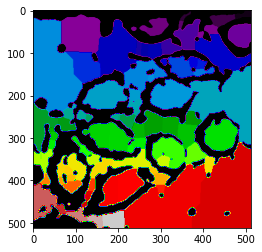

In [9]:
image  = otsu 
image = np.array(image,dtype=np.uint8)
# image = cv2.dilate(image, np.ones((11,11), np.uint8))
# image = cv2.erode(image, np.ones((15,15), np.uint8))
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((19, 19)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

plt.imshow(labels, cmap=plt.cm.nipy_spectral)

## Find Contour

In [18]:
image  = otsu 
image = np.array(image,dtype=np.uint8)
_,countours,_=cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
cv2.drawContours(image,countours,-1,(255,255,255),3)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

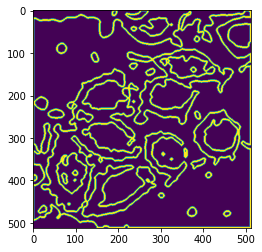

In [20]:
plt.imshow(image)

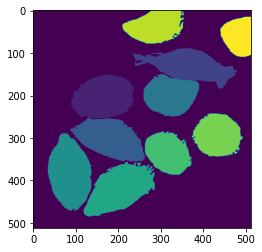

In [24]:
img_1 = cv2.imread("/Users/minruilu/Desktop/OneDrive - UNSW/UNSW/2020 Semester 2/comp9517/project/COMP9517 20T2 Group Project Image Sequences/DIC-C2DH-HeLa/Sequence 1 Masks/t002mask.tif",-1)
plt.imshow(img_1)

## Try Images in Dataset 3 with Yunfan's Threshold Method

In [3]:
os.chdir("/Users/minruilu/Desktop/OneDrive - UNSW/UNSW/2020 Semester 2/comp9517/project/COMP9517 20T2 Group Project Image Sequences/PhC-C2DL-PSC/Sequence 1")

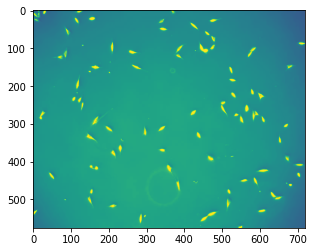

In [7]:
img = cv2.imread("t000.tif",cv2.IMREAD_GRAYSCALE) 
kernel = 11
img = cv2.GaussianBlur(img, (kernel, kernel), 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
th = np.where(hist == np.max(hist))[0]
ret, thresh = cv2.threshold(img, th[0] + 1, 255, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, np.ones((9, 9)))
thresh = cv2.dilate(thresh, np.ones((9, 9)))
plt.imshow(img)

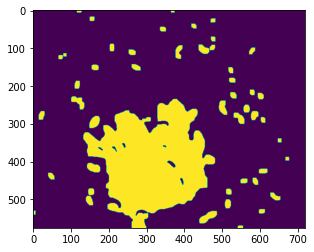

In [17]:
img = cv2.imread("t000.tif",cv2.IMREAD_GRAYSCALE) 
kernel =21
img = cv2.GaussianBlur(img, (kernel, kernel), 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
th = np.where(hist == np.max(hist))[0]
ret, thresh = cv2.threshold(img, th[0] + 1, 255, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, np.ones((9, 9)))
thresh = cv2.dilate(thresh, np.ones((9, 9)))
plt.imshow(thresh)

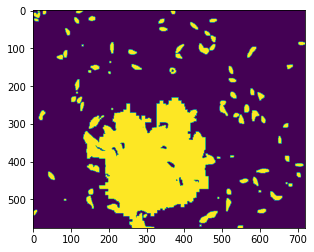

In [19]:
img = cv2.imread("t000.tif",cv2.IMREAD_GRAYSCALE) 
# kernel = 11
# img = cv2.GaussianBlur(img, (kernel, kernel), 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
th = np.where(hist == np.max(hist))[0]
ret, thresh = cv2.threshold(img, th[0] + 1, 255, cv2.THRESH_BINARY)
thresh = cv2.erode(thresh, np.ones((3, 3)))
thresh = cv2.dilate(thresh, np.ones((5, 5)))
plt.imshow(thresh)